# The Sparks Foundation

### Author: Arun Kumar Ravi

Copyright © 2021 Arun Kumar Ravi

## Task 1 - Prediction Using Supervised ML

In this exercise, we will predict the percentage of an student based on the number of study hours by applying a simple linear regression model as it involves just 2 variables.

The steps are:
<ol>
<li>Import libraries</li>
<li>Load Dataset</li>
<li>Data Exploration</li>
<li>Data Visualization</li>
<li>Data Preparation</li>
<li>Train Data</li>
<li>Test Data</li>
<li>Model Evaluation</li>
<li>Predicting The Score (Bonus)</li>
</ol>

### Import Libraries

In [76]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

### Load Dataset

In [77]:
# Importing data
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)

# Inspect the first 10 rows of this dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Exploration

In [78]:
# In order to see percentiles,mean,std,max,count of the given dataset by using the describe() function.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [79]:
# Inspect the summary detail of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing Data

Let's plot our data points on 2-D scatter plot graph from our dataset and see if we can able to find any relationship between the two variables.

Text(0, 0.5, 'Score')

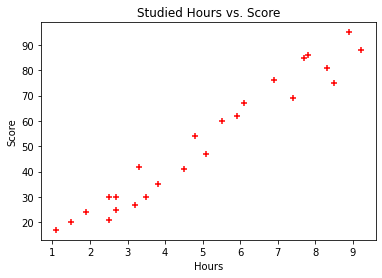

In [80]:
# Plotting the distribution of scores
plt.scatter(df.Hours,df.Scores,color='red',marker='+')
plt.title('Studied Hours vs. Score')
plt.xlabel('Hours')  
plt.ylabel('Score')

>**Insight:** From the graph above, It shows that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing Data

The next step is to split the data into "attributes" (inputs) and "labels" (outputs).

In [81]:
x = np.array(df.Hours)
y = np.array(df.Scores)

Reshaping the numpy array for vertical output

In [82]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

Now that we got our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [70]:
## We have Splitted Our Data Using 80:20 Ratio
print("X train.shape =", x_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", x_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20, 1)
X test.shape  = (5, 1)
Y test.shape  = (5, 1)


### Train Data

Calling the linear regression function and reshaping all the data and fitting it to the model.

In [84]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


Formula of simple linear regression

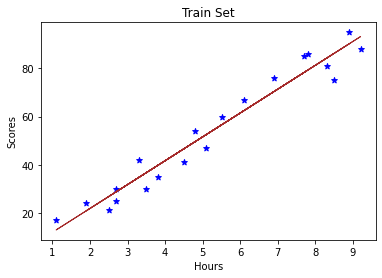

In [88]:
# Plotting the regression line
line = regressor.coef_ * x_train + regressor.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train, color='blue',marker='*')
plt.plot(x_train, line,color='brown',linewidth=1)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Train Set")
plt.show()

### Test Data

In [89]:
line2 = regressor.coef_ * x_test + regressor.intercept_

Predicting the scores for test data

In [90]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


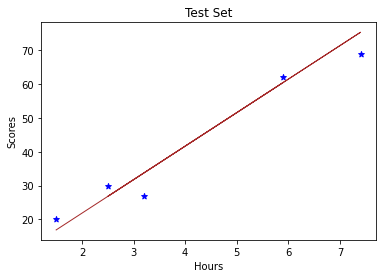

In [91]:
##plotting on test data
plt.scatter(x_test,y_test,color='blue',marker='*')
plt.plot(x_test,line2,color='brown',linewidth=1)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Test Set")
plt.show()

### Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [94]:
y_test1 = y_test.flatten()
prediction = y_pred.flatten()
df_compare = pd.DataFrame({ 'Actual':y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [95]:
R_square = metrics.r2_score(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("Coefficient             =", R_square)
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Coefficient             = 0.9454906892105356
Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


>**Insight**: Above **94%** percentage of coefficient indicates that above fitted Model is a **GOOD MODEL**

### Predicting The Score

In [96]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [[93.69173249]]


>**Result**: From the above result we can say that if a studied for 9.25 then student will secured **93.69 MARKS**